# Preprocessing from sql json to timeseries csv

In [1]:
import pandas as pd
import json

Json-fil: assetindex.json

{"price_date":"2003-12-31","price":224.48,"price_type":"Index","quotation":"Price","sec_ref":503415,"sec_no":"85000075","sec_short_name":"EQ_SWE"}
,{"price_date":"2004-01-30","price":238.87,"price_type":"Index","quotation":"Price","sec_ref":503415,"sec_no":"85000075","sec_short_name":"EQ_SWE"}
,{"price_date":"2004-02-27","price":250.56,"price_type":"Index","quotation":"Price","sec_ref":503415,"sec_no":"85000075","sec_short_name":"EQ_SWE"}

Läs in till DataFrame

In [2]:
with open('../data/assetindex.json') as datafile:
    data = json.load(datafile)
index_raw = pd.DataFrame(data)

In [3]:
index_raw.head()

,price_date,price,price_type,quotation,sec_ref,sec_no,sec_short_name
0,2003-12-31,224.48,Index,Price,503415,85000075,EQ_SWE
1,2004-01-30,238.87,Index,Price,503415,85000075,EQ_SWE
2,2004-02-27,250.56,Index,Price,503415,85000075,EQ_SWE
3,2004-03-31,248.29,Index,Price,503415,85000075,EQ_SWE
4,2004-04-30,251.56,Index,Price,503415,85000075,EQ_SWE


In [8]:
index_df = index_raw.pivot(index='price_date', columns='sec_short_name', values='price')
index_df.index = pd.to_datetime(index_df.index)
index_df.sort_index(inplace=True)

In [9]:
index_df.head()

sec_short_name,ALTERNATIVE,CPI,EQ_SWE,EQ_WORLD,IR_1,IR_15,IR_5,PROPERTY,SPREAD
price_date,,,,,,,,,
2003-12-15,NaN,278.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,100.000000,NaN,224.48,4041.233665,0.029400,0.048920,0.03988,100.4,0.00379
2004-01-15,NaN,278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-30,100.812146,NaN,238.87,4241.075265,0.027374,0.048141,0.04050,100.9,0.00400
2004-02-15,NaN,277.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


KPI släpar efter 15 dagar

In [10]:
index_df.bfill(axis=0, inplace=True)

In [11]:
index_df.head()

sec_short_name,ALTERNATIVE,CPI,EQ_SWE,EQ_WORLD,IR_1,IR_15,IR_5,PROPERTY,SPREAD
price_date,,,,,,,,,
2003-12-15,100.000000,278.6,224.48,4041.233665,0.029400,0.048920,0.03988,100.4,0.00379
2003-12-31,100.000000,278.0,224.48,4041.233665,0.029400,0.048920,0.03988,100.4,0.00379
2004-01-15,100.812146,278.0,238.87,4241.075265,0.027374,0.048141,0.04050,100.9,0.00400
2004-01-30,100.812146,277.3,238.87,4241.075265,0.027374,0.048141,0.04050,100.9,0.00400
2004-02-15,101.725526,277.3,250.56,4341.993088,0.025854,0.046236,0.03755,101.4,0.00270


Remove CPI midmonth

In [12]:
index_df.drop([date for date in index_df.index if date.day==15], inplace=True)

In [13]:
index_df.head()

sec_short_name,ALTERNATIVE,CPI,EQ_SWE,EQ_WORLD,IR_1,IR_15,IR_5,PROPERTY,SPREAD
price_date,,,,,,,,,
2003-12-31,100.000000,278.0,224.48,4041.233665,0.029400,0.048920,0.03988,100.40,0.00379
2004-01-30,100.812146,277.3,238.87,4241.075265,0.027374,0.048141,0.04050,100.90,0.00400
2004-02-27,101.725526,279.4,250.56,4341.993088,0.025854,0.046236,0.03755,101.40,0.00270
2004-03-31,102.640223,279.4,248.29,4375.960151,0.022710,0.046868,0.03415,101.91,0.00290
2004-04-30,101.088818,280.1,251.56,4331.790677,0.024333,0.049752,0.03875,102.41,0.00320


<Axes: xlabel='price_date'>

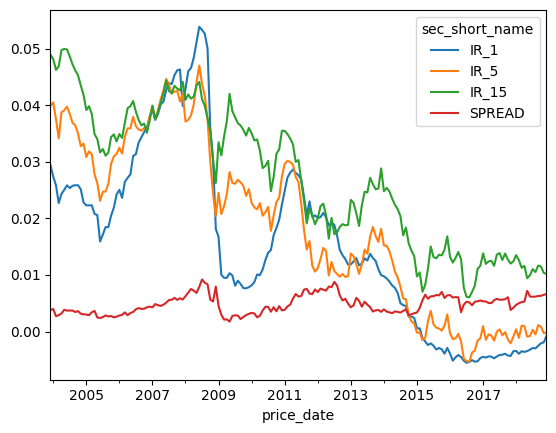

In [14]:
index_df[['IR_1', 'IR_5', 'IR_15', 'SPREAD']].plot()

<Axes: xlabel='price_date'>

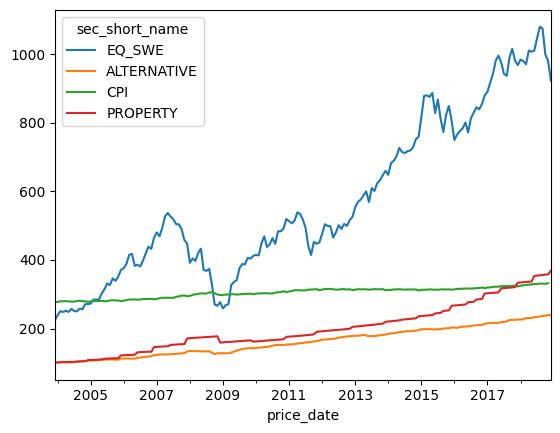

In [15]:
index_df[['EQ_SWE', 'ALTERNATIVE', 'CPI', 'PROPERTY']].plot()

### Save as csv

In [16]:
index_df.to_csv('../data/index.csv')